## Import Library

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df_comb=pd.read_csv('../data/movies_combined.csv')
df_cpi=pd.read_csv('../data/CPIAUCNS.csv')

In [162]:
df_cpi['year'] = pd.to_datetime(df_cpi['DATE']).dt.year
cpi=df_cpi[['year','CPIAUCNS']].groupby('year').mean().reset_index()
cpi

,year,CPIAUCNS
0,1913,9.883333
1,1914,10.016667
2,1915,10.108333
3,1916,10.883333
4,1917,12.825000
...,...,...
107,2020,258.811167
108,2021,270.969750
109,2022,292.654917
110,2023,304.701583


In [163]:
df_comb[df_comb['release_year']<=1913]

,wiki_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,release_year,...,imdb_id,combined_revenue,release_month,release_day,primaryTitle,startYear,averageRating,numVotes,tconst,director
5769,28703057,/m/0czdh_n,The Corbett-Fitzsimmons Fight,1897-05-22,100000.0,NaN,[],[],"[('/m/01z02hx', 'Sports')]",1897.0,...,NaN,100000.0,5.0,22.0,NaN,NaN,0.0,0.0,NaN,Unknown


In [164]:
df_comb[df_comb['release_year']==2016]

,wiki_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,release_year,...,imdb_id,combined_revenue,release_month,release_day,primaryTitle,startYear,averageRating,numVotes,tconst,director
3648,27554912,/m/0c03gcc,Kung Fu Panda 3,2016-03-18,NaN,NaN,[],[],[],2016.0,...,tt2267968,521170825.0,3.0,18.0,Kung Fu Panda 3,2016.0,7.1,196873.0,tt2267968,Alessandro Carloni


In [165]:
df_comb=df_comb[df_comb['release_year']>=1913] 

In [166]:
def cpi_calculator(df, year_to_map=2016):
    df_comb["inflated_revenue"]=df_comb.apply(lambda x: x['combined_revenue']*cpi[cpi['year']==year_to_map]['CPIAUCNS'].values[0]/cpi[cpi['year']==x['release_year']]['CPIAUCNS'].values[0], axis=1)
    return df
df_comb=cpi_calculator(df_comb)

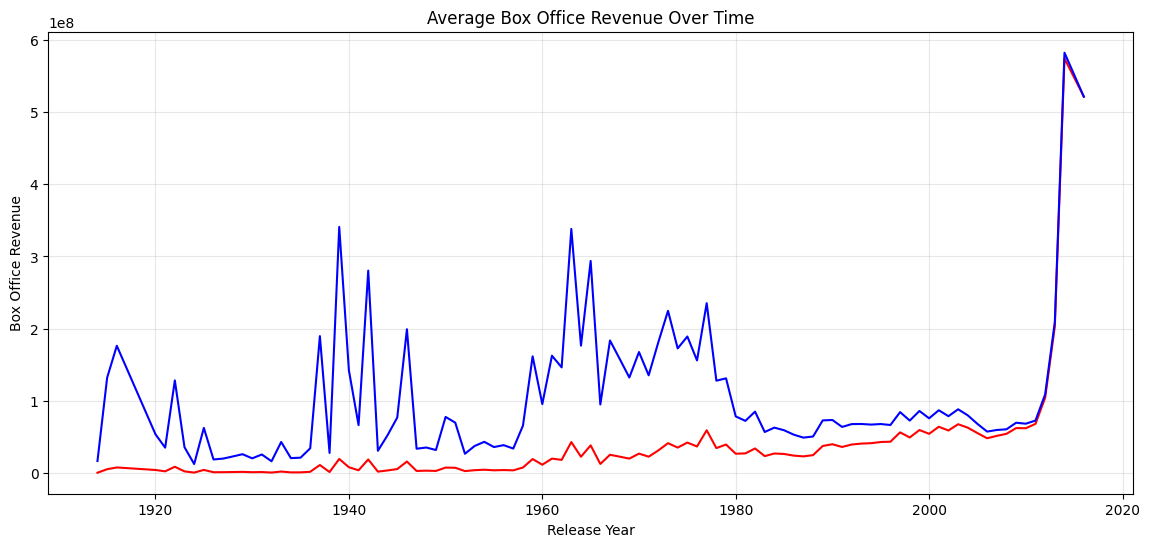

In [167]:
plt.figure(figsize=(14, 6))
yearly_avg = df_comb.groupby("release_year")["combined_revenue"].mean()
yearly_inflated_avg = df_comb.groupby("release_year")["inflated_revenue"].mean()
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, color="red")
sns.lineplot(x=yearly_inflated_avg.index, y=yearly_inflated_avg.values, color="blue")
plt.title("Average Box Office Revenue Over Time")
plt.xlabel("Release Year")
plt.ylabel("Box Office Revenue")
plt.grid(True, alpha=0.3)
plt.show()

In [168]:
df_comb.to_csv('../data/movies_combined_inflated.csv', index=False)